In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib

import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

from scipy import stats
from scipy.stats import kurtosis, skew

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from statsmodels.tsa.tsatools import lagmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [2]:
tableGA=pd.read_csv('Analytics Main - Jan 1st - Dec 7th.csv',delimiter=',')

In [3]:
tableGA=tableGA.dropna()

In [4]:
tableGA['Date']=pd.to_datetime(tableGA['Date'],format='%d/%m/%Y')

In [5]:
tableGA.head()

,Date,Product Adds To Cart,Cart-to-Detail Rate,Unique Purchases,Product Checkouts,Buy-to-Detail Rate
0,2021-01-01,"7,671",16.43%,"1,907","32,100",4.08%
1,2021-01-02,"5,827",16.89%,"1,645","24,764",4.77%
2,2021-01-03,"7,905",14.99%,"2,246","28,748",4.26%
3,2021-01-04,"4,725",15.92%,"1,400","19,793",4.72%
4,2021-01-05,"4,114",15.58%,966,"19,071",3.66%


In [6]:
tableGA['weekend'] = ((tableGA.Date.dt.dayofweek) // 5 == 1).astype(float)

In [7]:
tableGA['weekday'] = tableGA['Date'].apply(lambda x: x.weekday())

In [8]:
pd.set_option('display.max_rows', 10)

In [9]:
# Feature engineering with the date
tableGA['year']=tableGA.Date.dt.year 
tableGA['month']=tableGA.Date.dt.month 
tableGA['day']=tableGA.Date.dt.day

In [10]:
# For the next graphics
tableGA['month_num'] = tableGA['month']

tableGA['month'].replace('1','1 - January',inplace=True)
tableGA['month'].replace('2','2 - Febuary',inplace=True)
tableGA['month'].replace('3','3 - March',inplace=True)
tableGA['month'].replace('4','4- April',inplace=True)
tableGA['month'].replace('5','5 - May',inplace=True)
tableGA['month'].replace('6','6 - June',inplace=True)
tableGA['month'].replace('7','7 - July',inplace=True)
tableGA['month'].replace('8','8 - August',inplace=True)
tableGA['month'].replace('9','8 - September',inplace=True)
tableGA['month'].replace('10','10 - October',inplace=True)
tableGA['month'].replace('11','11 - November',inplace=True)


tableGA['weekday_num'] = tableGA['weekday']
tableGA['weekday'].replace(0,'01 - Monday',inplace=True)
tableGA['weekday'].replace(1,'02 - Tuesday',inplace=True)
tableGA['weekday'].replace(2,'03 - Wednesday',inplace=True)
tableGA['weekday'].replace(3,'04 - Thursday',inplace=True)
tableGA['weekday'].replace(4,'05 - Friday',inplace=True)
tableGA['weekday'].replace(5,'06 - Saturday',inplace=True)
tableGA['weekday'].replace(6,'07 - Sunday',inplace=True)

In [11]:
tableGA=tableGA.dropna()

In [12]:
tableGA

,Date,Product Adds To Cart,Cart-to-Detail Rate,Unique Purchases,Product Checkouts,Buy-to-Detail Rate,weekend,weekday,year,month,day,month_num,weekday_num
0,2021-01-01,"7,671",16.43%,"1,907","32,100",4.08%,0.0,05 - Friday,2021,1,1,1,4
1,2021-01-02,"5,827",16.89%,"1,645","24,764",4.77%,1.0,06 - Saturday,2021,1,2,1,5
2,2021-01-03,"7,905",14.99%,"2,246","28,748",4.26%,1.0,07 - Sunday,2021,1,3,1,6
3,2021-01-04,"4,725",15.92%,"1,400","19,793",4.72%,0.0,01 - Monday,2021,1,4,1,0
4,2021-01-05,"4,114",15.58%,966,"19,071",3.66%,0.0,02 - Tuesday,2021,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-12-03,"5,083",11.25%,"1,398","4,225",3.09%,0.0,05 - Friday,2021,12,3,12,4
337,2021-12-04,"4,211",10.17%,"1,173","3,975",2.83%,1.0,06 - Saturday,2021,12,4,12,5
338,2021-12-05,"5,607",9.87%,"1,699","6,331",2.99%,1.0,07 - Sunday,2021,12,5,12,6
339,2021-12-06,"4,525",10.67%,"1,196","4,157",2.82%,0.0,01 - Monday,2021,12,6,12,0


# Product checkout visuals

In [13]:
tableGA["Product Checkouts"]=tableGA["Product Checkouts"].astype(str)

In [14]:
tableGA['Product Checkouts']=tableGA['Product Checkouts'].str.replace(',','').astype(int)

In [15]:
GA_PC_Group=tableGA.groupby(["month","weekday"])['Product Checkouts'].mean().reset_index()

In [16]:
GA_PC_Group=pd.pivot_table(GA_PC_Group,values=['Product Checkouts'],index=['weekday'],
                           columns=['month'],
                           aggfunc={'Product Checkouts':np.mean})

In [17]:
GA_PC_Group.sort_index(inplace=True)

In [18]:
GA_PC_Group

Product Checkouts                                         \
month                         1         2         3         4        5    
weekday                                                                   
01 - Monday             22161.50  17827.50  13645.80  13349.25  12575.2   
02 - Tuesday            19507.50  15852.50  12622.40  13763.00  12547.0   
03 - Wednesday          38961.25  22078.50  14826.80  30788.25  11207.0   
04 - Thursday           24589.75  17159.75  13443.25  17860.20   4972.5   
05 - Friday             28637.80  17625.25  13159.50  20334.20   5485.0   
06 - Saturday           25492.00  16837.50  12798.25  11000.00  11300.4   
07 - Sunday             36782.40  20723.25  17173.00  17476.50  15245.6   

                                                                               
month                6        7        8        9        10        11      12  
weekday                                                                        
01 - Monday     3783.00  2609.50  4677.40  4072.25  4188.75   8723.20  4157.0  
02 - Tuesday    3595.20  2827.50  4064.60  4095.25  3475.25   5954.00  3924.0  
03 - Wednesday  3141.00  2762.75  3593.75  4289.60  3190.75   5355.75  4268.0  
04 - Thursday   3012.50  3153.00  3220.00  3961.60  2492.50   7425.25  4826.0  
05 - Friday     2929.75  2229.40  3391.00  3041.50  3187.60  16394.50  4225.0  
06 - Saturday   2728.50  2208.40  3336.25  3207.00  3587.80   9137.00  3975.0  
07 - Sunday     4332.50  3250.25  4639.60  4821.25  4957.40  11553.25  6331.0

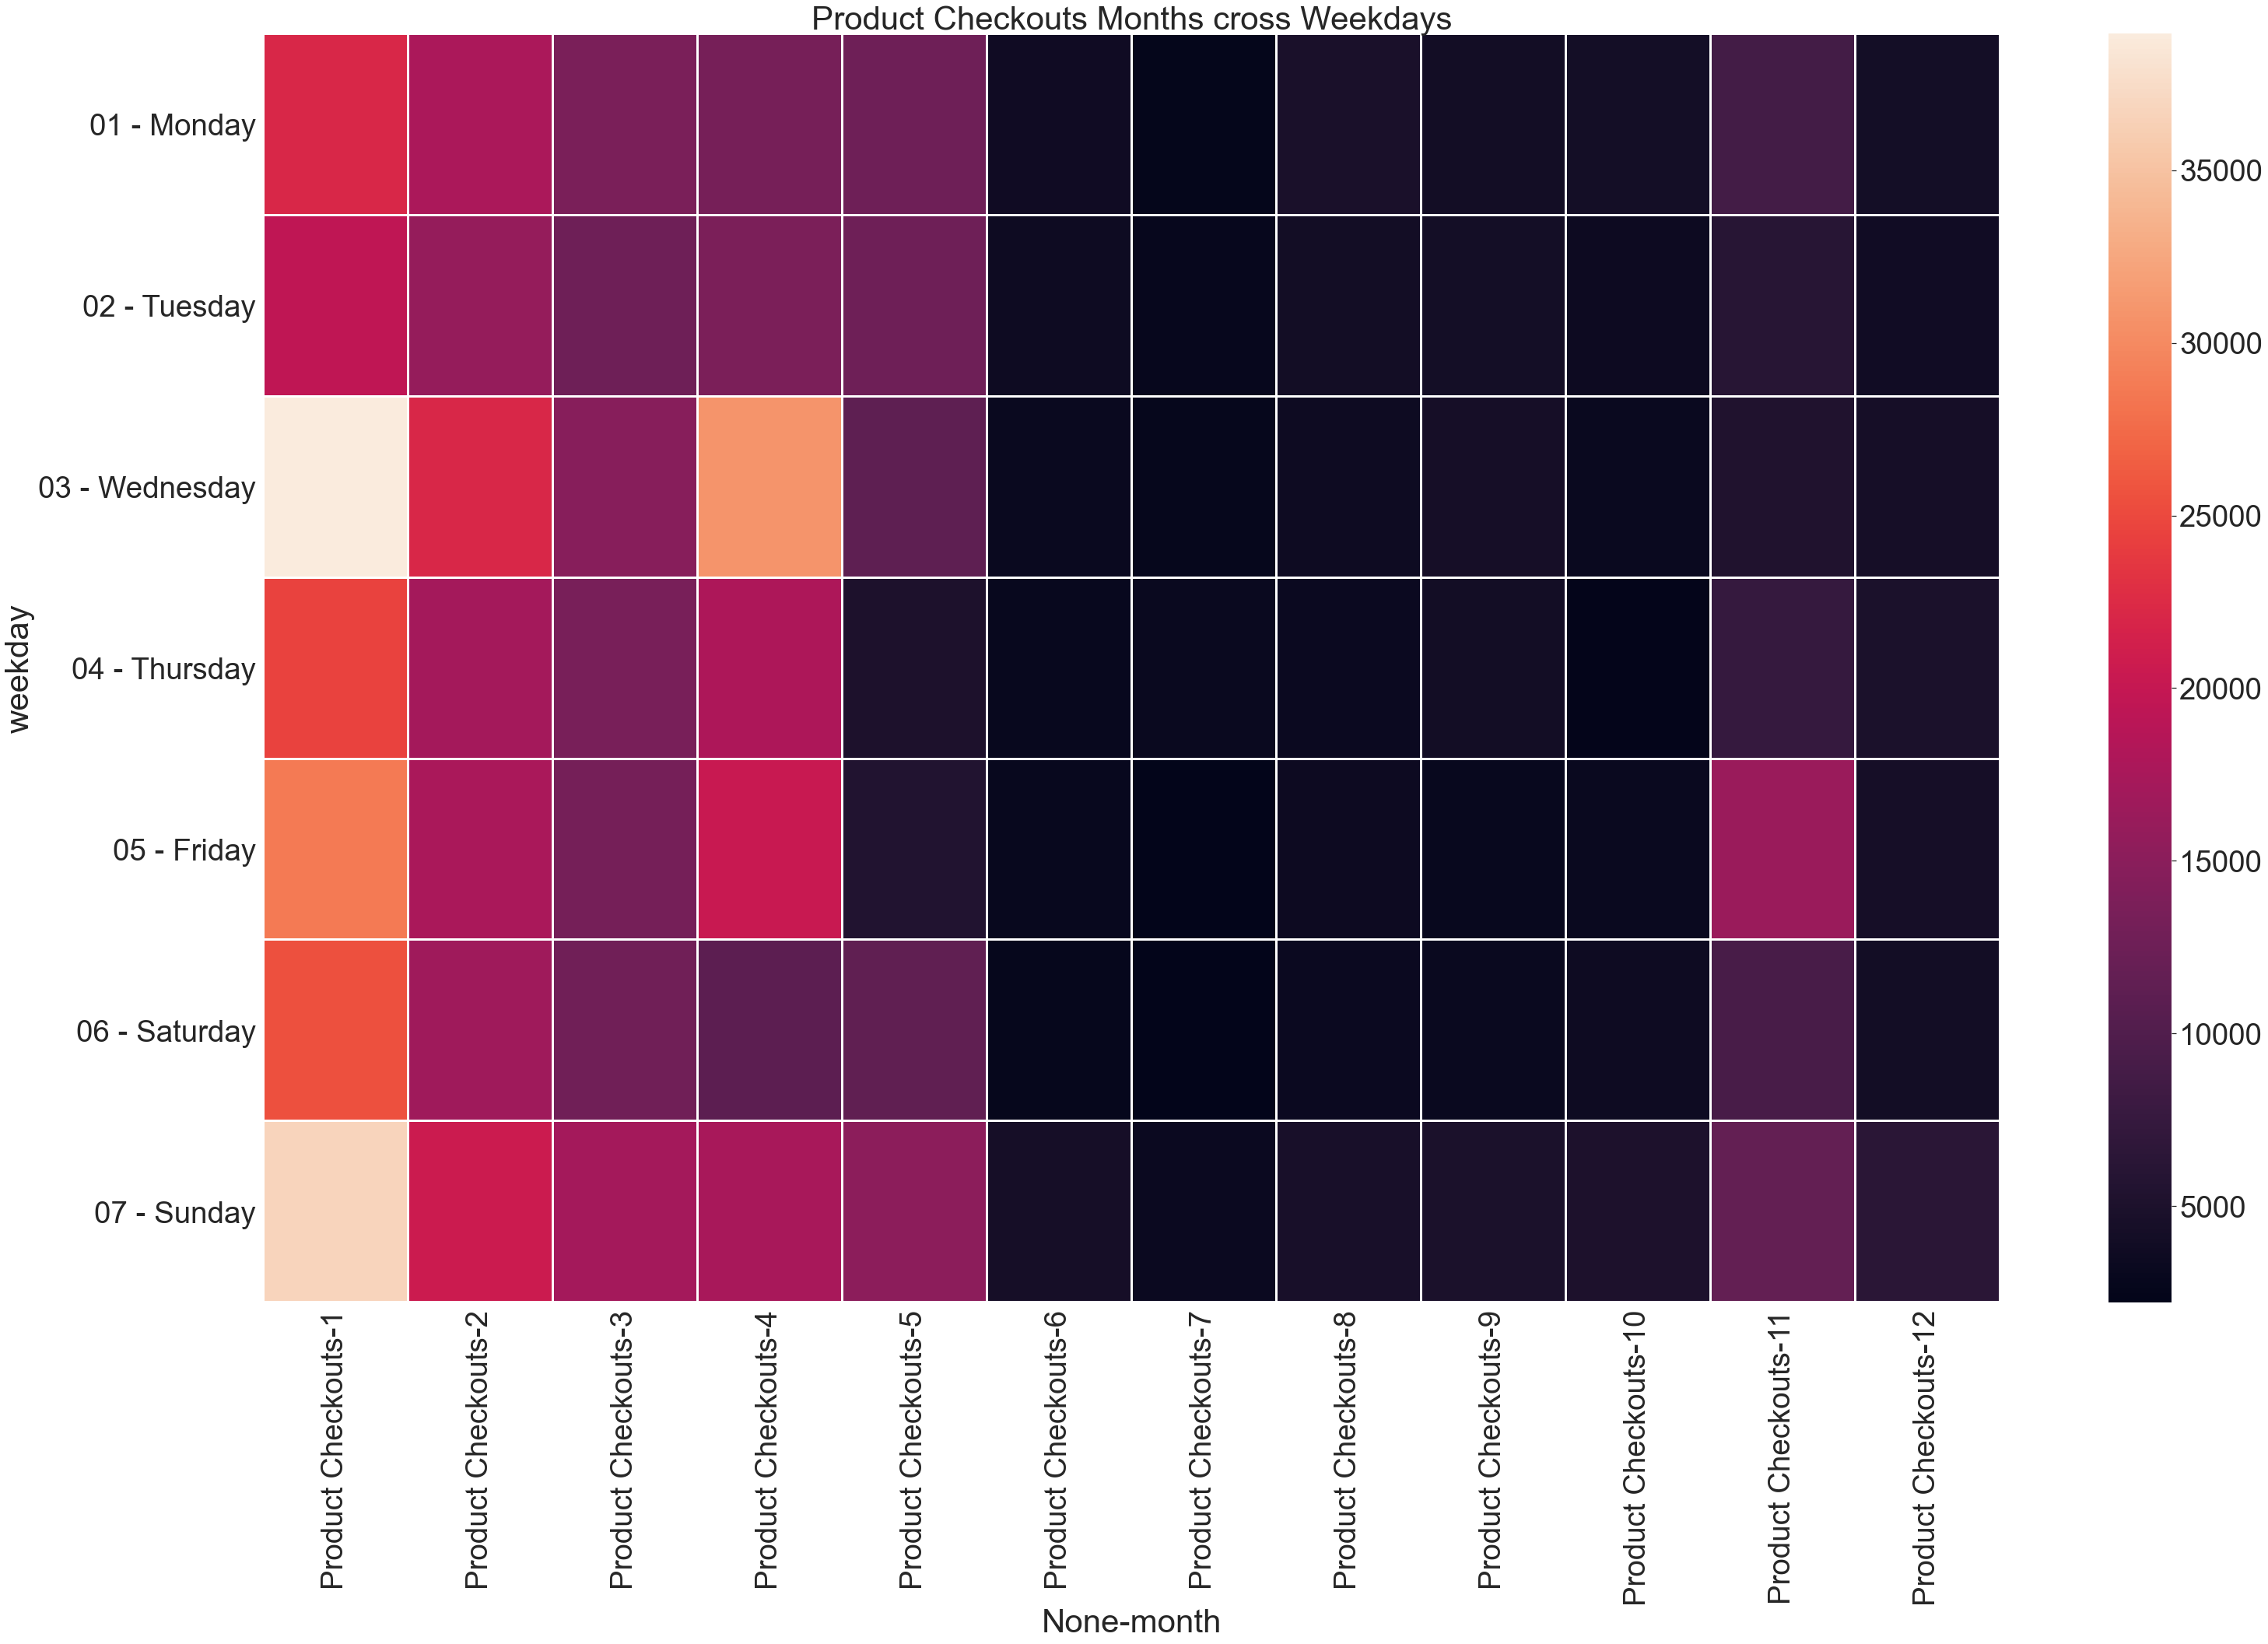

In [19]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(GA_PC_Group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Product Checkouts Months cross Weekdays')
plt.show()

In [20]:
GA_day_PC = tableGA.groupby(["month", "day"])['Product Checkouts'].mean().reset_index()
GA_day_PC = tableGA.pivot('day','month','Product Checkouts')
GA_day_PC.sort_index(inplace=True)

In [21]:
GA_day_PC = pd.pivot_table(tableGA, values=['Product Checkouts'],index=['day'],
                                 columns=['month'],
                                aggfunc={'Product Checkouts': np.mean})

In [22]:
GA_day_PC

Product Checkouts                                                      \
month                1        2        3        4        5       6       7    
day                                                                           
1               32100.0  28678.0  15888.0   6534.0  37508.0  3179.0  4439.0   
2               24764.0  21838.0  12723.0   9339.0  52358.0  3720.0  2903.0   
3               28748.0  33915.0  17584.0  10711.0  46381.0  2915.0  2793.0   
4               19793.0  24370.0  15625.0  14391.0  34517.0  3109.0  4894.0   
5               19071.0  33798.0  17876.0  18032.0  32956.0  2627.0  3469.0   
..                  ...      ...      ...      ...      ...     ...     ...   
27              31721.0  14578.0  11458.0  24756.0   3224.0  5406.0  3255.0   
28              23266.0  18965.0  16475.0  77099.0   7054.0  4061.0  3877.0   
29              31708.0      NaN  10170.0  39267.0   6267.0  5099.0  4932.0   
30              33050.0      NaN  10964.0  50243.0   5342.0  4243.0  2817.0   
31              52807.0      NaN  10878.0      NaN   3749.0     NaN  2804.0   

                                                
month      8       9       10       11      12  
day                                             
1      3765.0  4161.0  4008.0   5856.0  4268.0  
2      3787.0  3859.0  3969.0   4272.0  4826.0  
3      3438.0  3491.0  5323.0   3486.0  4225.0  
4      3129.0  3695.0  5311.0   3341.0  3975.0  
5      2943.0  5280.0  3774.0   4233.0  6331.0  
..        ...     ...     ...      ...     ...  
27     3263.0  3272.0  3885.0  19856.0     NaN  
28     3061.0  5922.0  4935.0  17920.0     NaN  
29     4727.0  6551.0  4029.0  15665.0     NaN  
30     5916.0  4795.0  3556.0   6510.0     NaN  
31     4804.0     NaN  5400.0      NaN     NaN  

[31 rows x 12 columns]

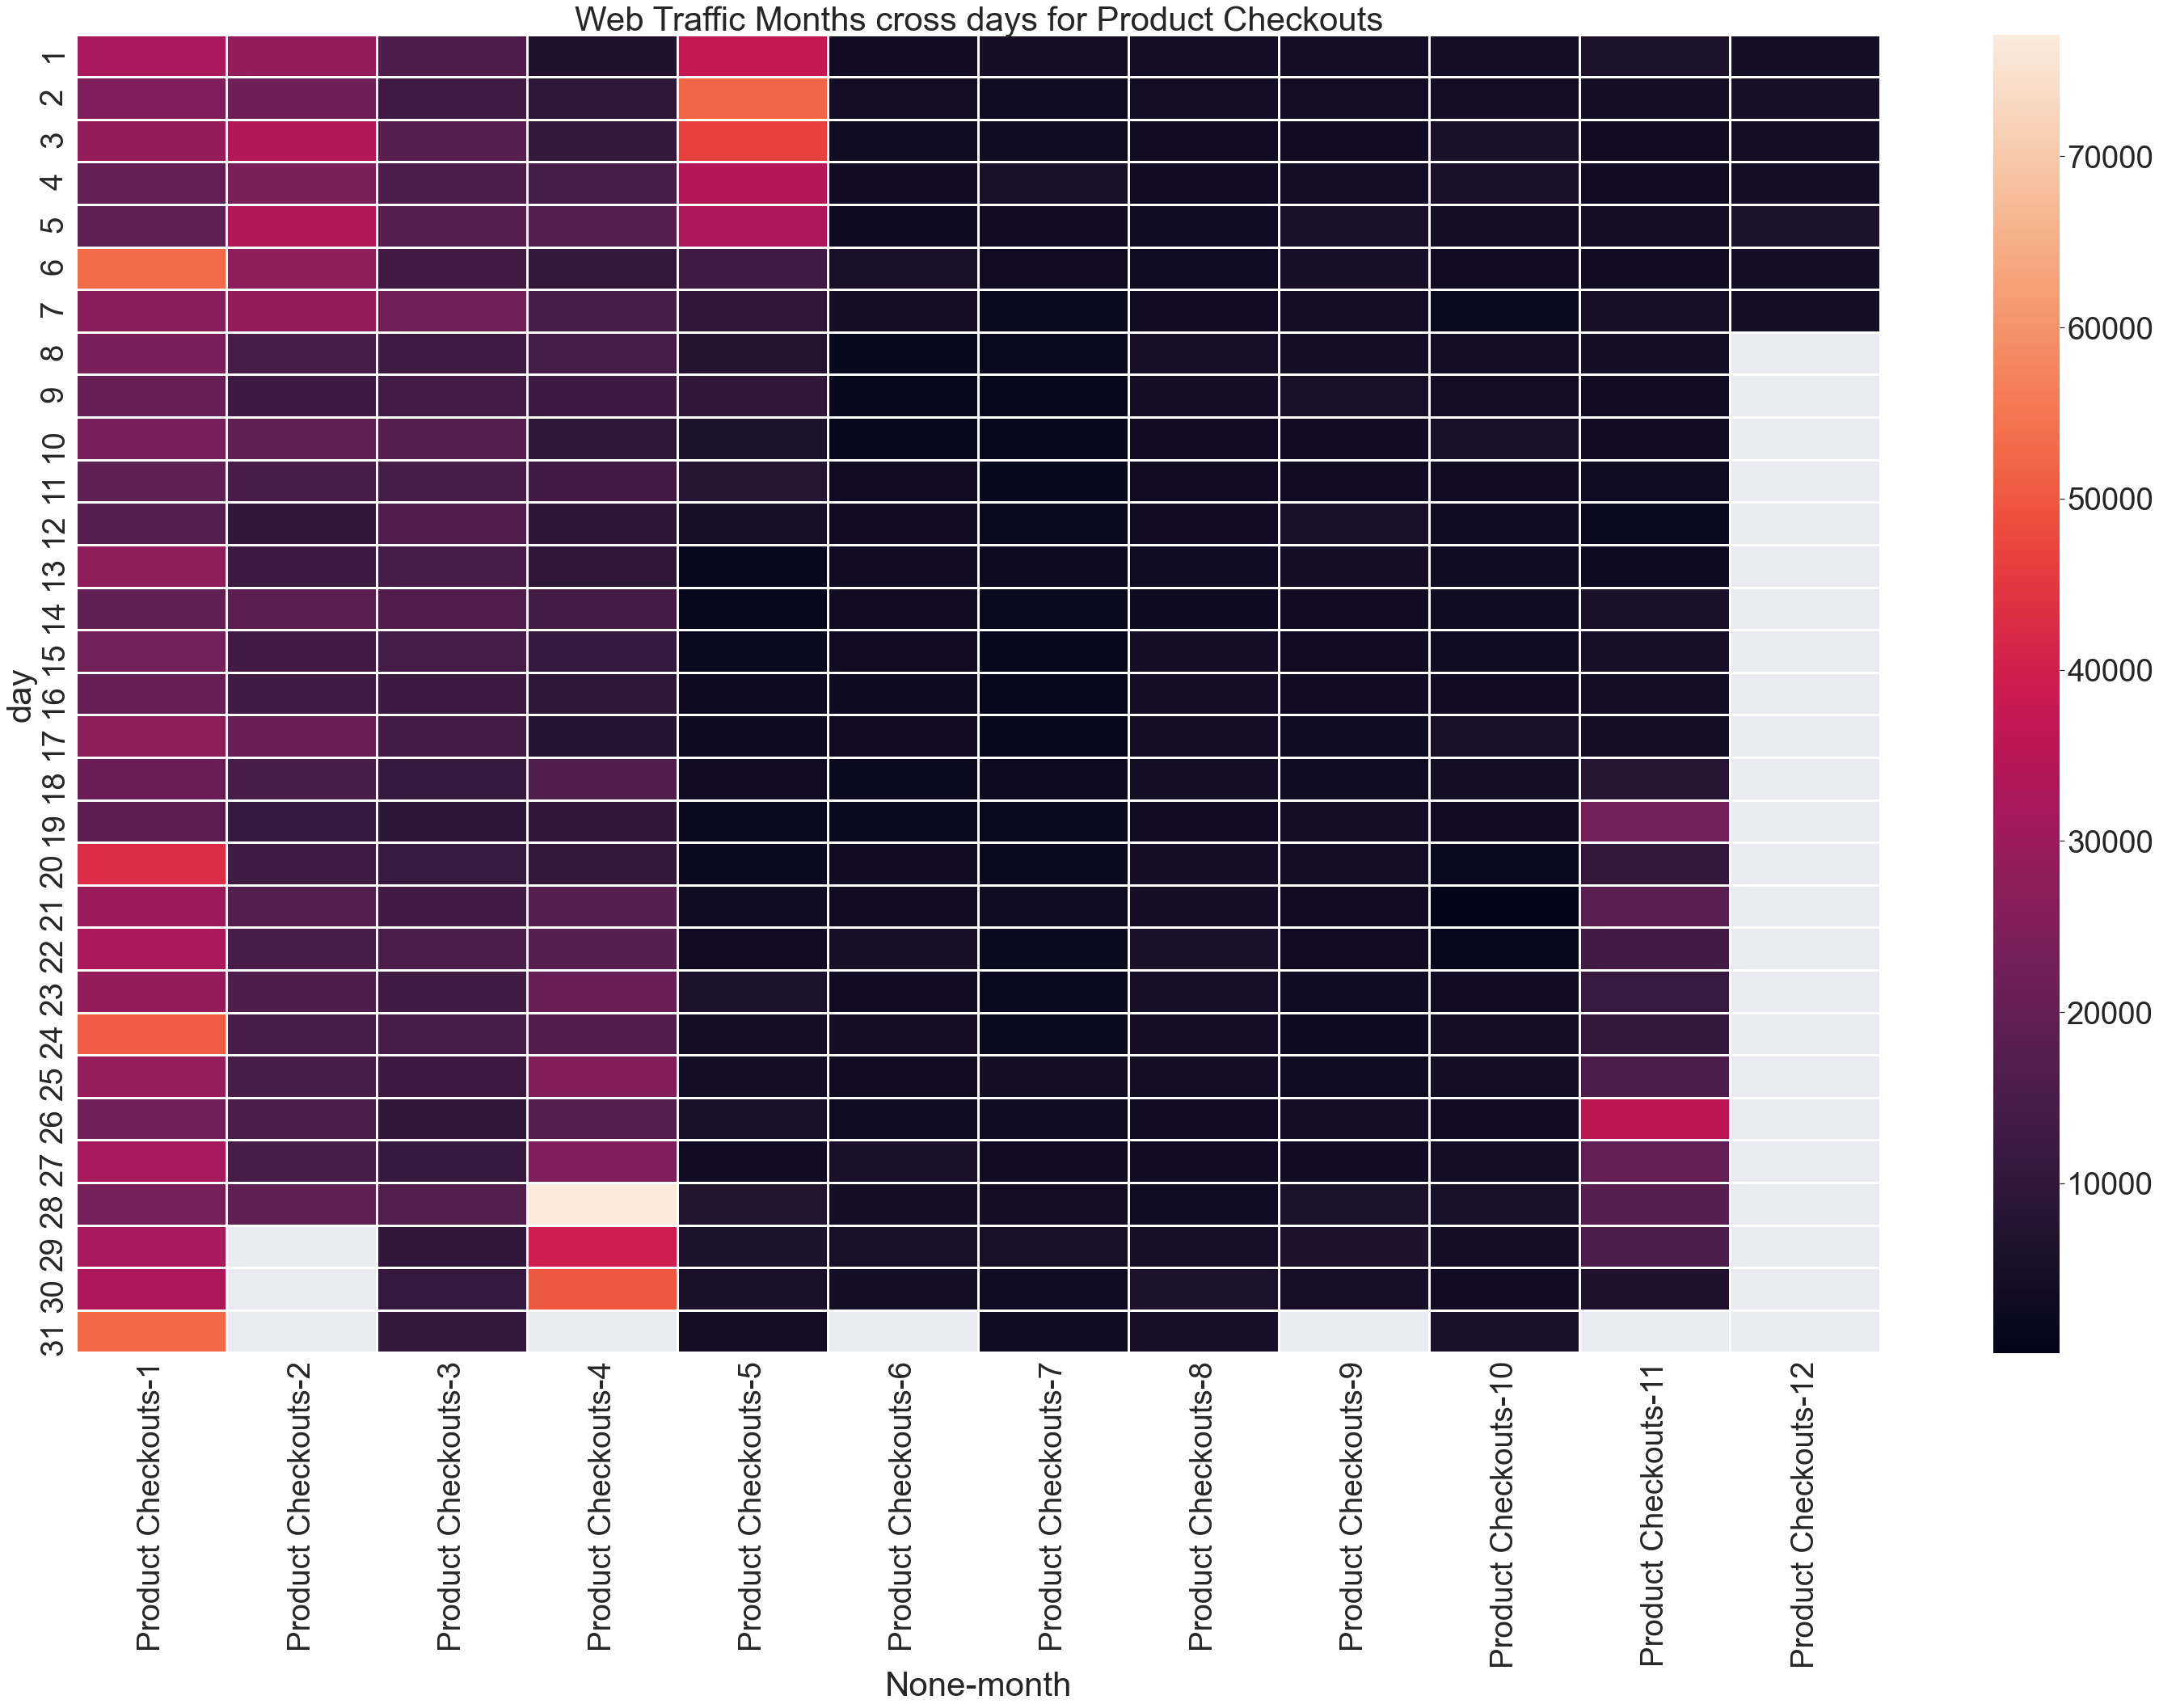

In [23]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(GA_day_PC, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days for Product Checkouts')
plt.show()

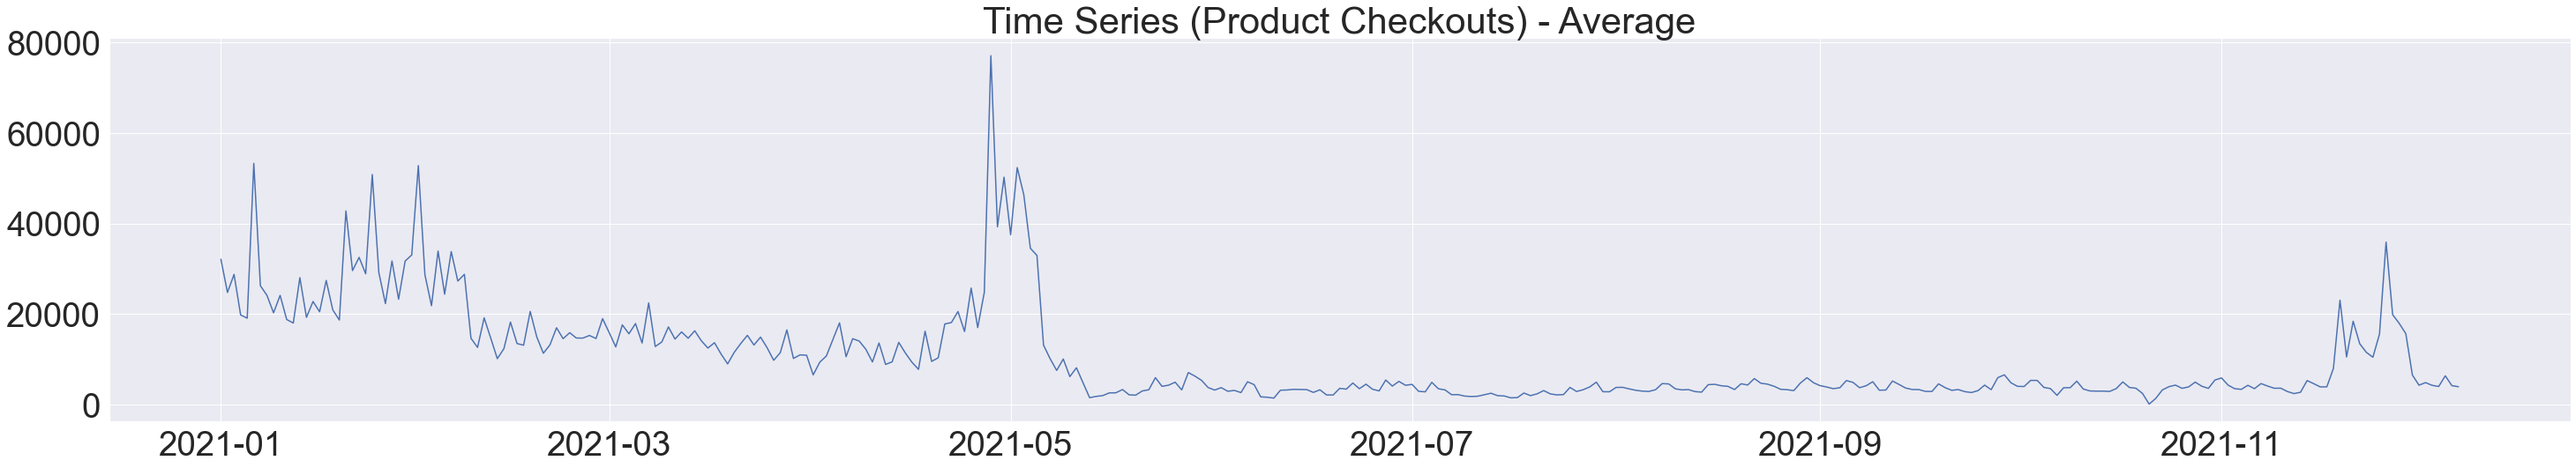

In [24]:
plt.figure(figsize=(50, 8))
mean_group_PC = tableGA[['Date','Product Checkouts']].groupby(['Date'])['Product Checkouts'].mean()
plt.plot(mean_group_PC)
plt.title('Time Series (Product Checkouts) - Average')
plt.show()

# Arima Model

In [25]:
PC_timeseries_year_means =  pd.DataFrame(mean_group_PC).reset_index(drop=False)
PC_timeseries_year_means['weekday'] = PC_timeseries_year_means['Date'].apply(lambda x: x.weekday())
PC_timeseries_year_means['Date_str'] = PC_timeseries_year_means['Date'].apply(lambda x: str(x))
PC_timeseries_year_means[['year','month','day']] = pd.DataFrame(PC_timeseries_year_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(PC_timeseries_year_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
PC_timeseries_year_means['day'] = date_staging['day']*1
PC_timeseries_year_means.head()
PC_timeseries_year_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               341 non-null    datetime64[ns]
 1   Product Checkouts  341 non-null    int32         
 2   weekday            341 non-null    int64         
 3   Date_str           341 non-null    object        
 4   year               341 non-null    object        
 5   month              341 non-null    object        
 6   day                341 non-null    object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 17.4+ KB


In [26]:
# evaluate Rolling mean, Rolling Standard deviation and Test for the stationnarity
df_date_index_PC = PC_timeseries_year_means[['Date','Product Checkouts']].set_index('Date')

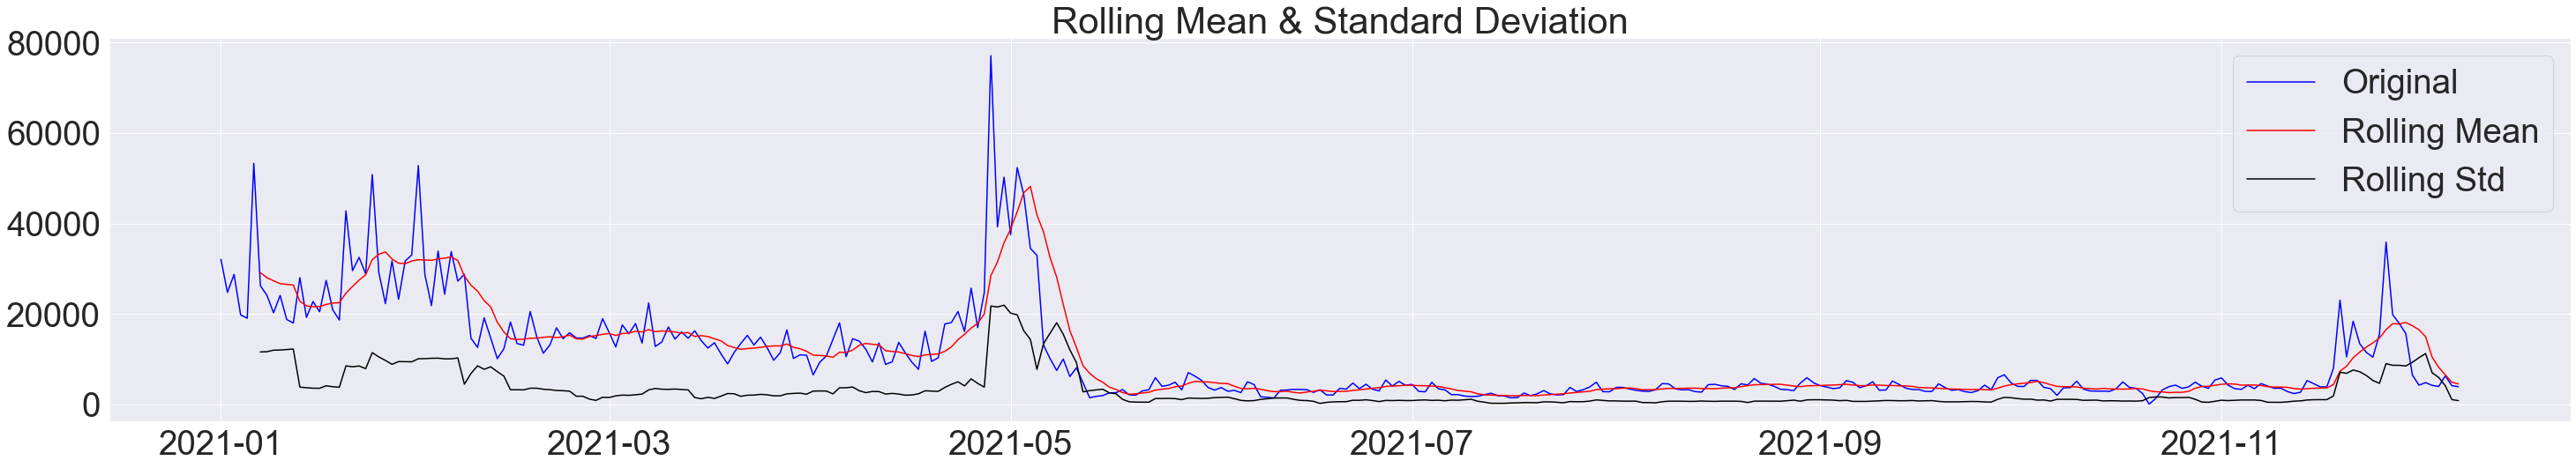

Results of Dickey-Fuller Test:
Test Statistic                  -2.369241
p-value                          0.150607
#Lags Used                      13.000000
Number of Observations Used    327.000000
Critical Value (1%)             -3.450507
Critical Value (5%)             -2.870420
Critical Value (10%)            -2.571501
dtype: float64


In [27]:
def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Product Checkouts'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_date_index_PC) 

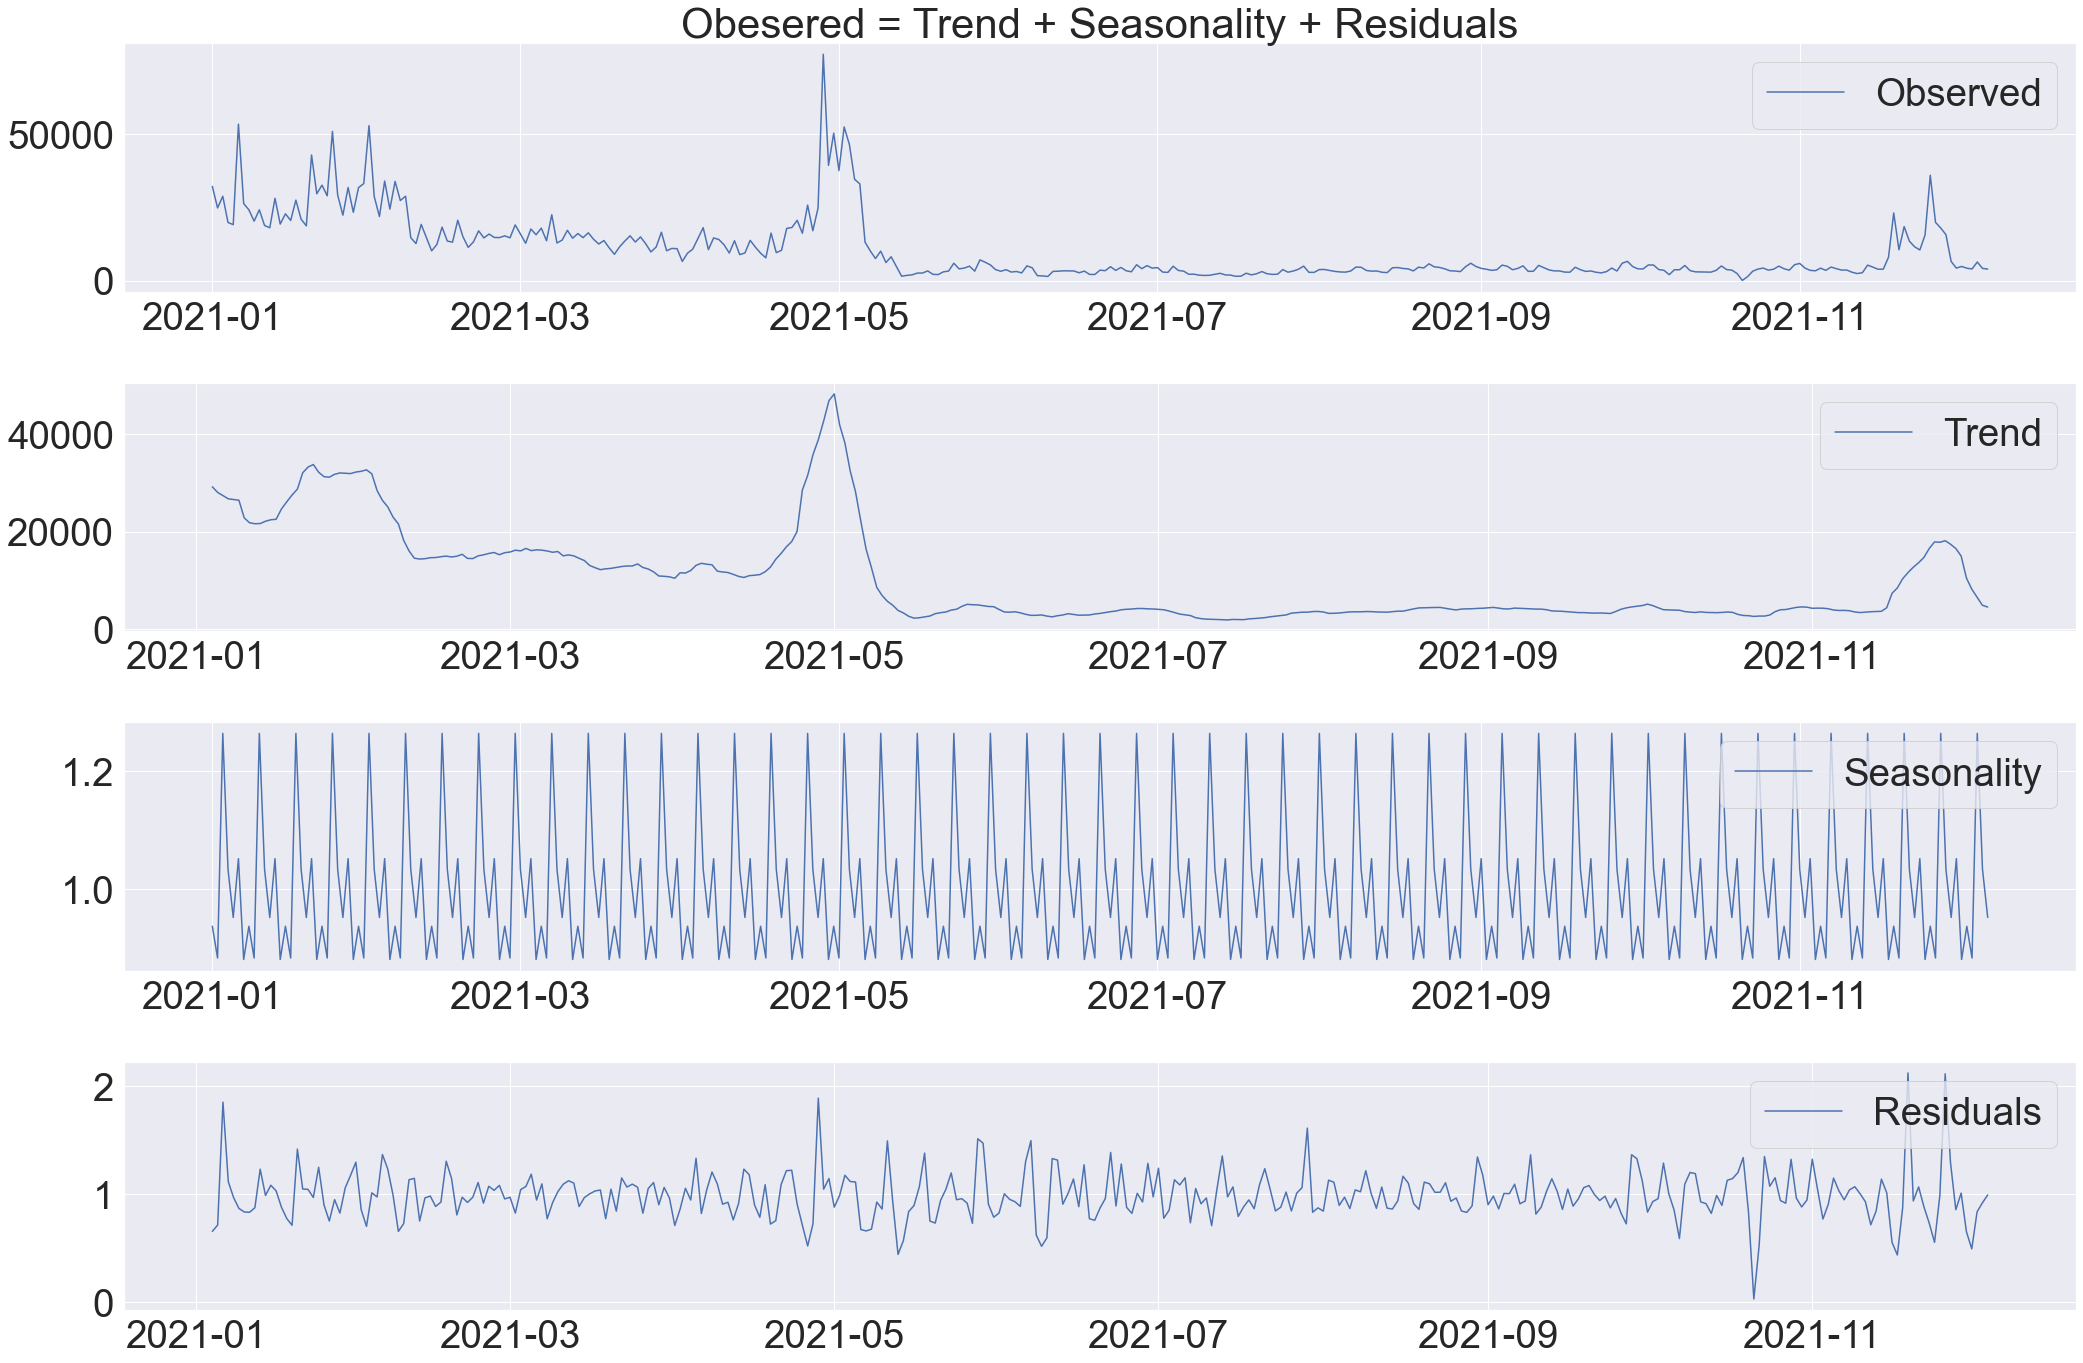

In [28]:
# Naive decomposition of our Time Series as explained above
decomposition = sm.tsa.seasonal_decompose(df_date_index_PC, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams['figure.figsize'] = 30, 20

plt.subplot(411)
plt.title('Obesered = Trend + Seasonality + Residuals')
plt.plot(df_date_index_PC, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
residual

Date
2021-01-01         NaN
2021-01-02         NaN
2021-01-03         NaN
2021-01-04    0.657156
2021-01-05    0.715632
                ...   
2021-12-03    0.920871
2021-12-04    0.994370
2021-12-05         NaN
2021-12-06         NaN
2021-12-07         NaN
Name: resid, Length: 341, dtype: float64

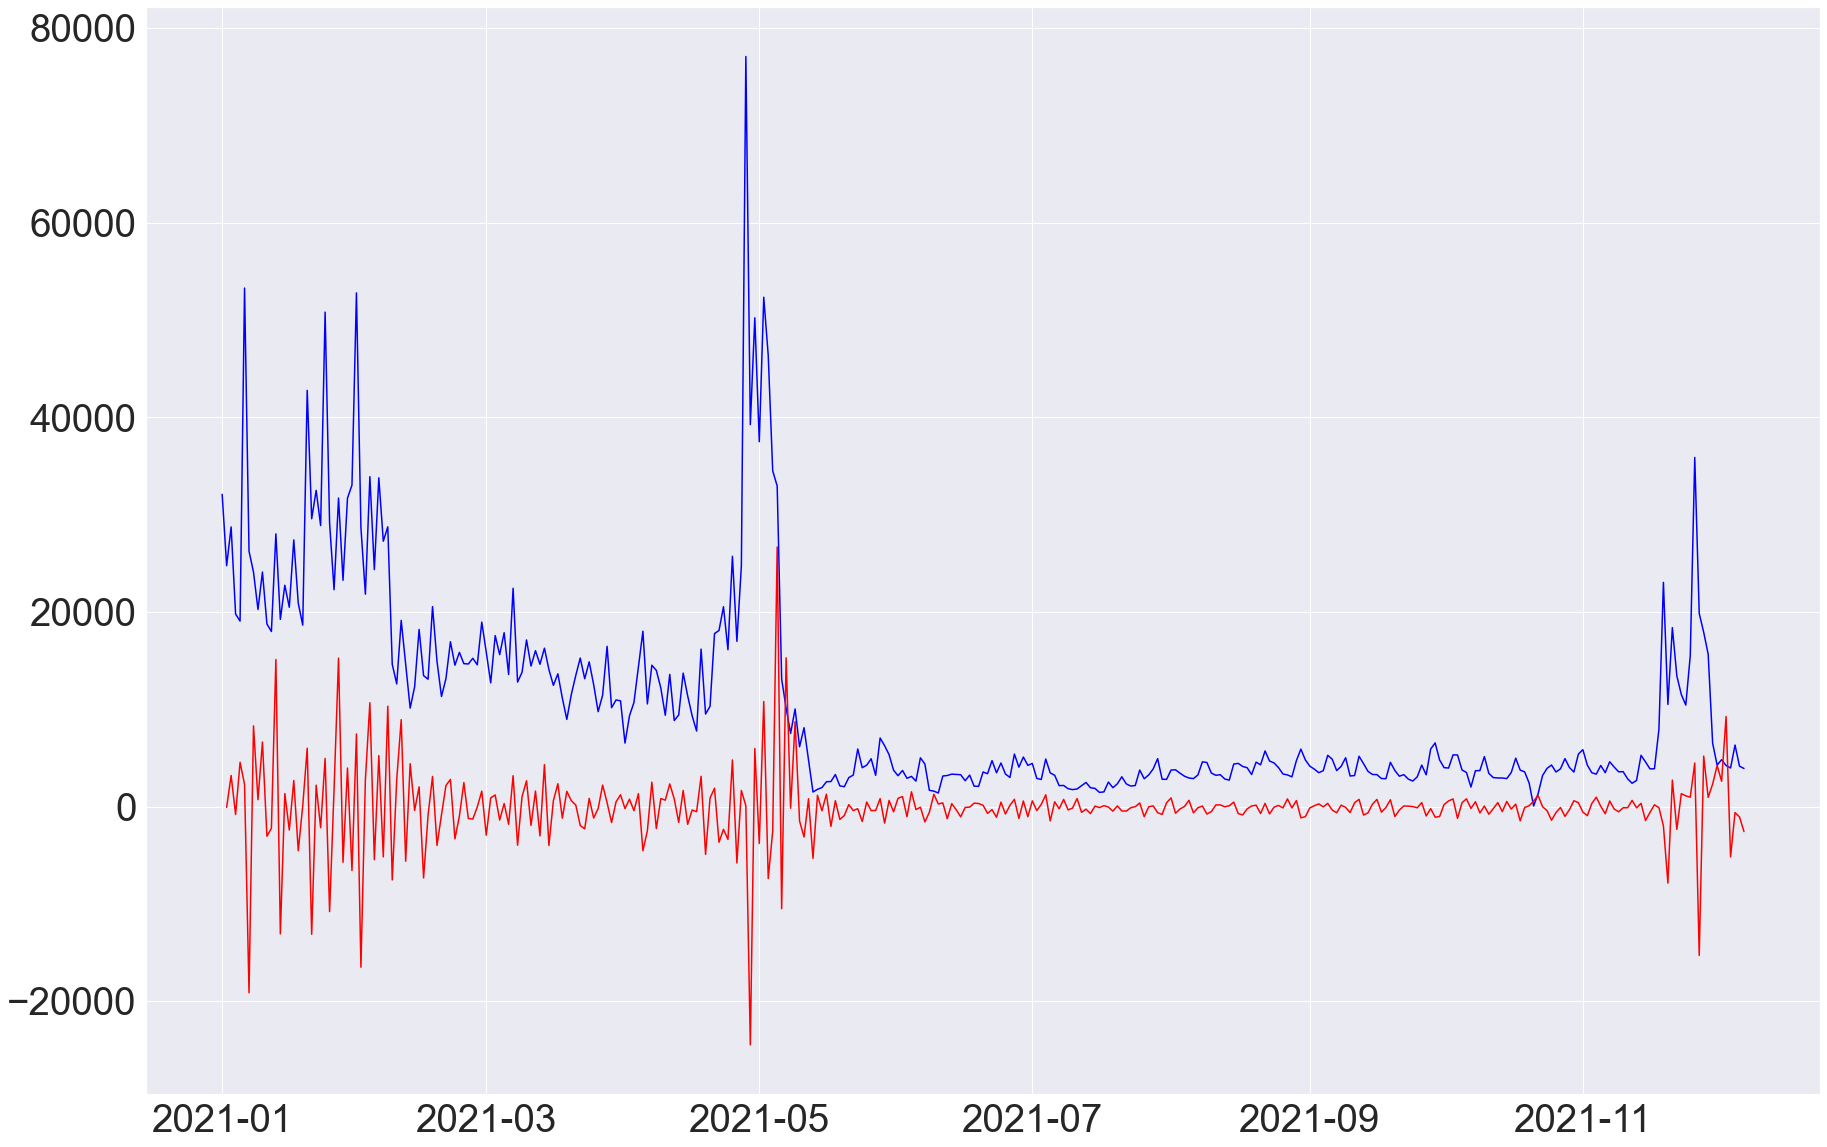

In [34]:
from statsmodels.tsa.arima_model import ARIMA

modelARIMA_PC = ARIMA(df_date_index_PC, order=(7, 1, 0))  
results_AR_PC = modelARIMA_PC.fit(disp=-1)  
plt.plot(df_date_index_PC, color = 'blue')
plt.plot(results_AR_PC.fittedvalues, color='red')
plt.show()

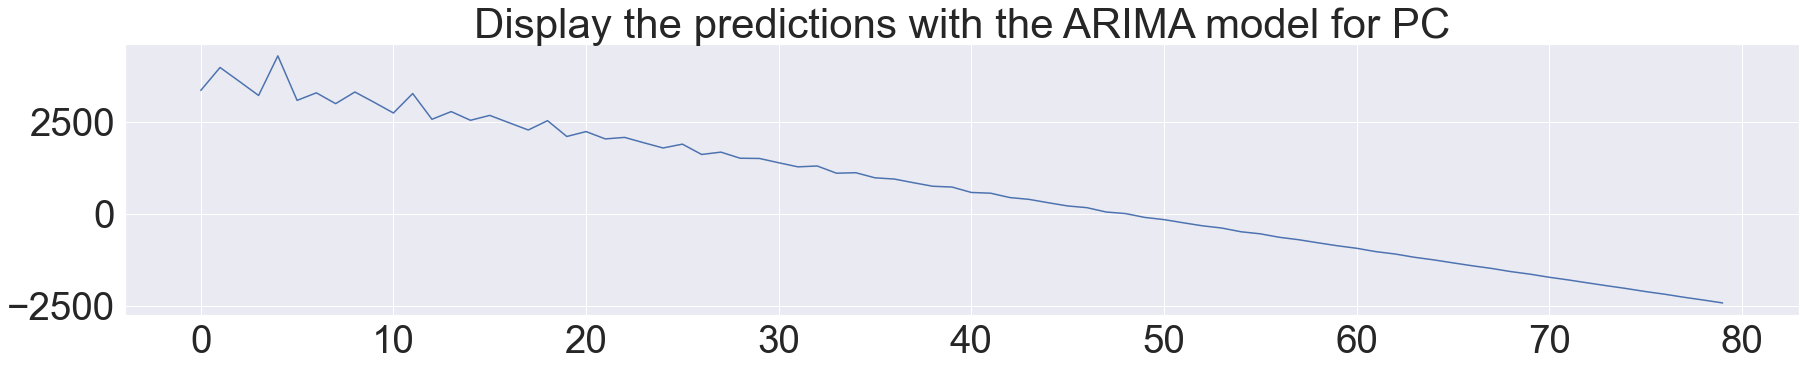

array([ 3.35333801e+03,  3.97634600e+03,  3.59829711e+03,  3.21529096e+03,
        4.29263219e+03,  3.08185510e+03,  3.28729604e+03,  2.99248461e+03,
        3.30920174e+03,  3.02857705e+03,  2.73878704e+03,  3.26780884e+03,
        2.56755748e+03,  2.77656536e+03,  2.54014911e+03,  2.67326192e+03,
        2.47415909e+03,  2.27658073e+03,  2.52978252e+03,  2.09988134e+03,
        2.23311146e+03,  2.03360091e+03,  2.07491958e+03,  1.92874631e+03,
        1.78710373e+03,  1.89160047e+03,  1.61074181e+03,  1.67426076e+03,
        1.50818044e+03,  1.50184649e+03,  1.38545180e+03,  1.27396983e+03,
        1.29690805e+03,  1.10094683e+03,  1.11413766e+03,  9.75356109e+02,
        9.42125595e+02,  8.41795915e+02,  7.46231325e+02,  7.24290154e+02,
        5.77491595e+02,  5.57055208e+02,  4.38488504e+02,  3.89021995e+02,
        2.97503350e+02,  2.10386057e+02,  1.63670148e+02,  4.55186771e+01,
        3.38666371e+00, -1.01079381e+02, -1.60736504e+02, -2.47204423e+02,
       -3.29815428e+02, -

In [36]:
forecast_PC = results_AR_PC.forecast(steps = 80)[0]
plt.figure(figsize=(30, 5))
plt.plot(pd.DataFrame(forecast_PC))
plt.title('Display the predictions with the ARIMA model for PC')
plt.show()
forecast_PC

In [37]:
def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

In [38]:
def diff_creation(data):
    data["diff"] = np.nan
    data.loc[1:, "diff"] = (data.iloc[1:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data

In [39]:
df_count_PC=diff_creation(PC_timeseries_year_means)
# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count_PC,lag)
last_date = lagged['Date'].max()

In [41]:
#DataFrame to collect the predictions
df_prediction_arima_PC = df_date_index_PC.copy()

list_date = []
for i in range(81):
    if i >0:
        list_date.append(last_date  + pd.to_timedelta(i, unit='D'))
    
predictions_arima_PC= pd.DataFrame(list_date,columns = ['Date'])
predictions_arima_PC['Product Checkouts'] = 0
predictions_arima_PC.set_index('Date',inplace=True)
predictions_arima_PC['Product Checkouts'] = (forecast_PC)

df_prediction_arima_PC = df_prediction_arima_PC.append(predictions_arima_PC)
df_prediction_arima_PC.reset_index(drop=False,inplace=True)

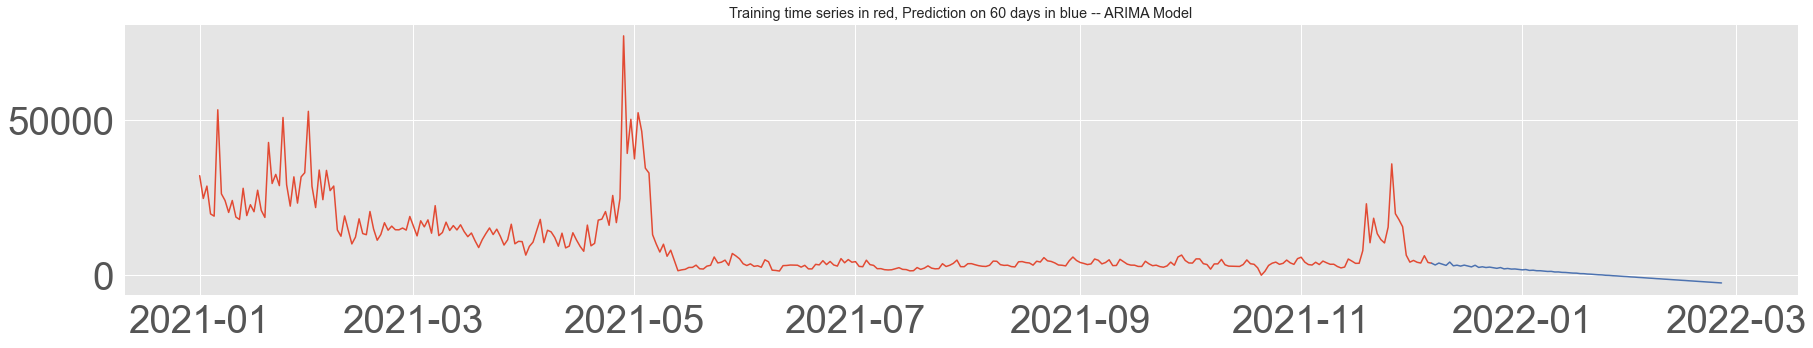

In [42]:
df_arima_PC = df_prediction_arima_PC[['Product Checkouts','Date']]
df_train_PC = df_arima_PC[df_arima_PC['Date'] <= last_date]
df_pred_PC = df_arima_PC[df_prediction_arima_PC['Date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train_PC.Date,df_train_PC['Product Checkouts'])
plt.plot(df_pred_PC.Date,df_pred_PC['Product Checkouts'],color='b')
plt.title('Training time series in red, Prediction on 60 days in blue -- ARIMA Model')
plt.show()

In [43]:
df_pred_PC.to_csv('ARIMA_PRED_PC_SEPNOTEBOOK_80PRED.csv', index=False)

# Machine learning Approach

In [44]:
PC_timeseries_means =  pd.DataFrame(mean_group_PC).reset_index(drop=False)
PC_timeseries_means['weekday'] = PC_timeseries_means['Date'].apply(lambda x: x.weekday())
PC_timeseries_means['Date_str'] = PC_timeseries_means['Date'].apply(lambda x: str(x))
PC_timeseries_means[['year','month','day']] = pd.DataFrame(PC_timeseries_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(PC_timeseries_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
PC_timeseries_means['day'] = date_staging['day']*1
PC_timeseries_means.head()

,Date,Product Checkouts,weekday,Date_str,year,month,day
0,2021-01-01,32100,4,2021-01-01 00:00:00,2021,01,01
1,2021-01-02,24764,5,2021-01-02 00:00:00,2021,01,02
2,2021-01-03,28748,6,2021-01-03 00:00:00,2021,01,03
3,2021-01-04,19793,0,2021-01-04 00:00:00,2021,01,04
4,2021-01-05,19071,1,2021-01-05 00:00:00,2021,01,05


In [45]:
df_count_PC=diff_creation(PC_timeseries_means)

In [46]:
# Creation of 7 features with "diff"
lag = 7
lagged_PC = lag_func(df_count_PC,lag)
last_date_PC = lagged_PC['Date'].max()

In [47]:
# Train Test split
def train_test(data_lag):
    xc = ["lag%d" % i for i in range(1,lag+1)] + ['weekday'] + ['day']
    split = 0.70
    xt = data_lag[(lag+1):][xc]
    yt = data_lag[(lag+1):]["diff"]
    isplit = int(len(xt) * split)
    x_train, y_train, x_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]
    return x_train, y_train, x_test, y_test, xt, yt

In [48]:
x_train_PC, y_train_PC, x_test_PC, y_test_PC, xt_PC, yt_PC = train_test(lagged_PC)

In [49]:
# Linear Model
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, xt, yt, model2, model3):
    # Modelisation with all product
    model2.fit(x_tr, y_tr)

    prediction_PC = model2.predict(x_ts)
    r2 = r2_score(y_ts.to_numpy(), model2.predict(x_ts))
    mae = mean_absolute_error(y_ts.to_numpy(), model2.predict(x_ts))
    print ("-----------------------------------------------")
    print ("mae with 70% of the data to train:", mae)
    print ("-----------------------------------------------")

    # Model with all data
    model3.fit(xt, yt) 
    
    return model2, prediction_PC, model3

model2 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
model3 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

clr2, prediction_PC, clr1  = modelisation(x_train_PC, y_train_PC, x_test_PC, y_test_PC, xt_PC, yt_PC, model2, model3)

-----------------------------------------------
mae with 70% of the data to train: 1503.0697841499816
-----------------------------------------------


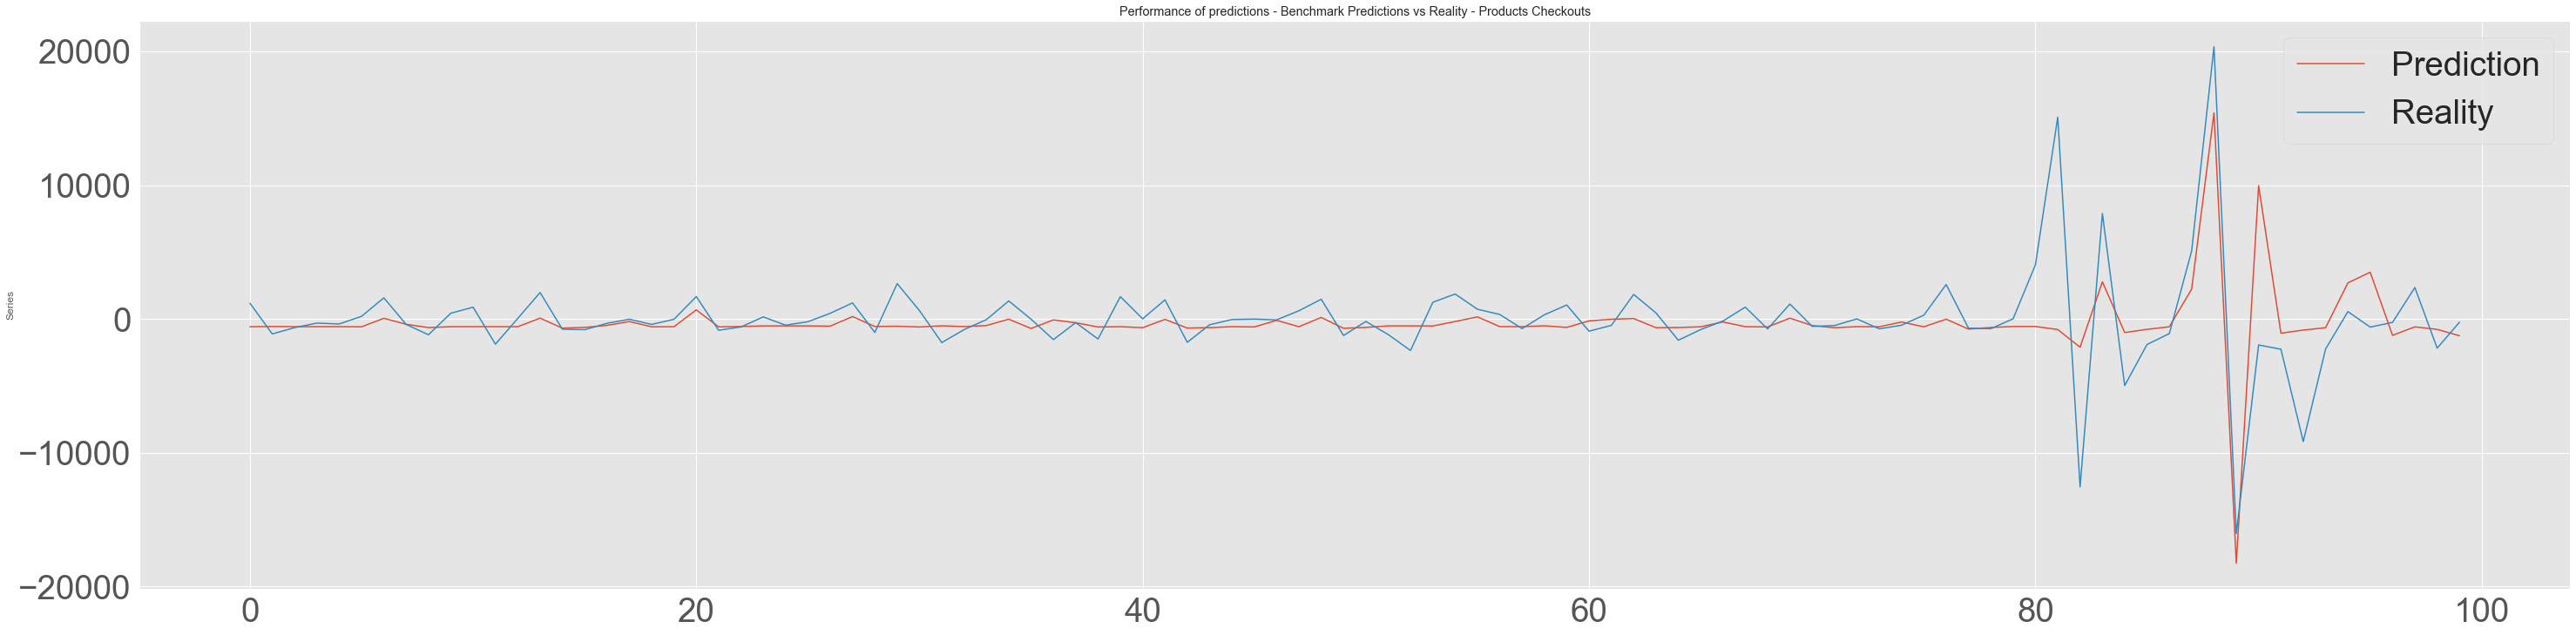

In [50]:
# Performance 1
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(prediction_PC,label='Prediction')
line_down, = plt.plot(np.array(y_test_PC),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality - Products Checkouts')
plt.show()

In [51]:
# Prediction
def pred_df(data,number_of_days):
    data_pred = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=1)),columns = ["Date"])
    for i in range(number_of_days):
        inter = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=i+2)),columns = ["Date"])
        data_pred = pd.concat([data_pred,inter]).reset_index(drop=True)
    return data_pred


In [52]:
data_to_pred_PC = pred_df(df_count_PC,80)

In [53]:
def initialisation(data_lag, data_pred, model, xtrain, ytrain, number_of_days):
    # Initialisation
    model.fit(xtrain, ytrain)
    
    for i in range(number_of_days-1):
        lag1 = data_lag.tail(1)["diff"].values[0]
        lag2 = data_lag.tail(1)["lag1"].values[0]
        lag3 = data_lag.tail(1)["lag2"].values[0]
        lag4 = data_lag.tail(1)["lag3"].values[0]
        lag5 = data_lag.tail(1)["lag4"].values[0]
        lag6 = data_lag.tail(1)["lag5"].values[0]
        lag7 = data_lag.tail(1)["lag6"].values[0]
        lag8 = data_lag.tail(1)["lag7"].values[0]
        
        data_pred['weekday'] = data_pred['Date'].apply(lambda x:x.weekday())
        weekday = data_pred['weekday'][0]
        
        row = pd.Series([lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,weekday]
                        ,['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        to_predict = pd.DataFrame(columns = ['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        prediction = pd.DataFrame(columns = ['diff'])
        to_predict = to_predict.append([row])
        prediction = pd.DataFrame(model.predict(to_predict),columns = ['diff'])

        # Loop
        if i == 0:
            last_predict = data_lag["Product Checkouts"][data_lag.shape[0]-1] + prediction.values[0][0]

        if i > 0 :
            last_predict = data_lag["Product Checkouts"][data_lag.shape[0]-1] + prediction.values[0][0]
            
            data_lag = pd.concat([data_lag,prediction.join(data_pred["Date"]).join(to_predict)]).reset_index(drop=True)
        data_lag["Product Checkouts"][data_lag.shape[0]-1] = last_predict
        
        # test
        data_pred = data_pred[data_pred["Date"]>data_pred["Date"][0]].reset_index(drop=True)
        
    return data_lag

model_fin = AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

In [54]:
lagged_PC = initialisation(lagged_PC, data_to_pred_PC, model_fin, xt_PC, yt_PC, 80)

In [55]:
lagged_PC[lagged_PC['diff']<0]
lagged_PC.loc[(lagged_PC['Product Checkouts'] < 0), 'Product Checkouts'] = 0

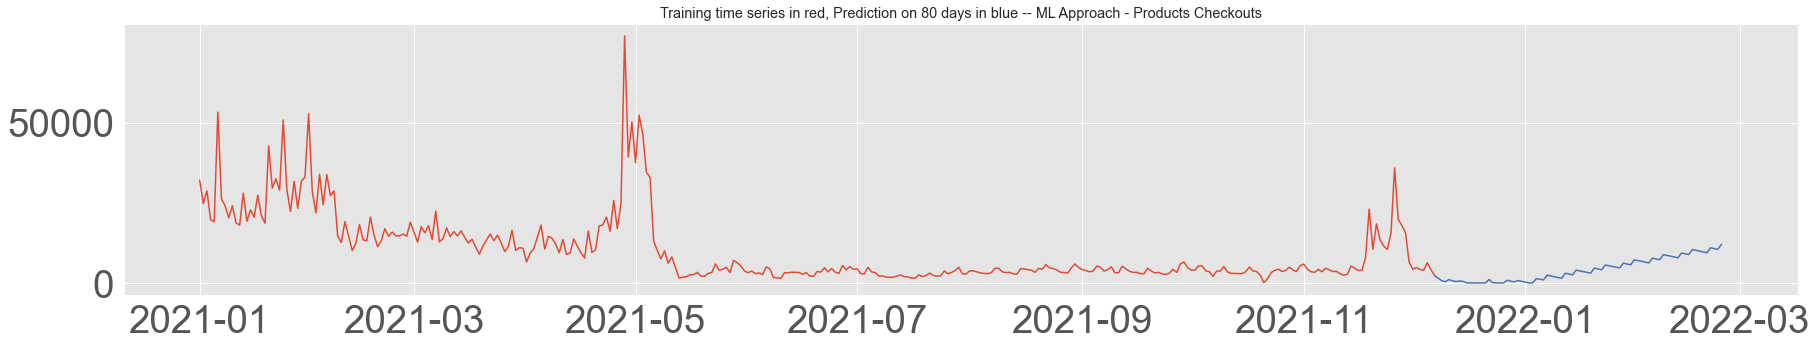

In [56]:
df_lagged_PC = lagged_PC[['Product Checkouts','Date']]
df_train_PC = df_lagged_PC[df_lagged_PC['Date'] <= last_date]
df_pred_PC = df_lagged_PC[df_lagged_PC['Date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train_PC.Date,df_train_PC['Product Checkouts'])
plt.plot(df_pred_PC.Date,df_pred_PC['Product Checkouts'],color='b')
plt.title('Training time series in red, Prediction on 80 days in blue -- ML Approach - Products Checkouts')
plt.show()

In [57]:
df_pred_PC.to_csv('MLMODEL_PRED_PC_SEPNOTEBOOK_80PRED.csv',index=False)

# BASIC Model

In [58]:
lagged_PC

,Date,Product Checkouts,weekday,Date_str,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2021-01-01,32100.000000,4.0,2021-01-01 00:00:00,2021,01,01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2021-01-02,24764.000000,5.0,2021-01-02 00:00:00,2021,01,02,-7336.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2021-01-03,28748.000000,6.0,2021-01-03 00:00:00,2021,01,03,3984.000000,-7336.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2021-01-04,19793.000000,0.0,2021-01-04 00:00:00,2021,01,04,-8955.000000,3984.000000,-7336.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2021-01-05,19071.000000,1.0,2021-01-05 00:00:00,2021,01,05,-722.000000,-8955.000000,3984.000000,-7336.000000,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2022-02-20,9408.406516,6.0,NaN,NaN,NaN,NaN,-254.115672,-264.048077,-247.347490,-247.347490,1552.204545,-208.449123,-262.478261,1494.112745,-254.115672
415,2022-02-21,10973.064743,0.0,NaN,NaN,NaN,NaN,1564.658228,-254.115672,-264.048077,-247.347490,-247.347490,1552.204545,-208.449123,-262.478261,1494.112745
416,2022-02-22,10710.586483,1.0,NaN,NaN,NaN,NaN,-262.478261,1564.658228,-254.115672,-264.048077,-247.347490,-247.347490,1552.204545,-208.449123,-262.478261
417,2022-02-23,10502.137360,2.0,NaN,NaN,NaN,NaN,-208.449123,-262.478261,1564.658228,-254.115672,-264.048077,-247.347490,-247.347490,1552.204545,-208.449123


In [59]:
lagged_basic_PC = lagged_PC[['Date','Product Checkouts','weekday']]
lagged_basic_tr_PC   = lagged_basic_PC[lagged_basic_PC['Date'] < last_date_PC]
lagged_basic_pred_PC = lagged_basic_PC[lagged_basic_PC['Date'] >= last_date_PC]
lagged_basic_pred_PC.drop('Product Checkouts',inplace=True,axis=1)

In [60]:
prediction_by_days_PC = pd.DataFrame(lagged_basic_PC.groupby(['weekday'])['Product Checkouts'].mean())
prediction_by_days_PC.reset_index(drop=False,inplace=True)
prediction_by_days_PC

,weekday,Product Checkouts
0,0.0,8676.609933
1,1.0,7825.871676
2,2.0,10806.290454
3,3.0,8110.748925
4,4.0,9416.702922
5,5.0,8264.723258
6,6.0,11259.590799


In [61]:
lagged_basic_pred_PC

,Date,weekday
340,2021-12-07,1.0
341,2021-12-09,3.0
342,2021-12-10,4.0
343,2021-12-11,5.0
344,2021-12-12,6.0
...,...,...
414,2022-02-20,6.0
415,2022-02-21,0.0
416,2022-02-22,1.0
417,2022-02-23,2.0


In [62]:
basic_pred_PC = pd.merge(lagged_basic_pred_PC,prediction_by_days_PC,on='weekday')
basic_approach_PC = pd.concat([lagged_basic_tr_PC,basic_pred_PC])

In [63]:
plot_basic_PC = np.array(basic_approach_PC[basic_approach_PC['Date'] > last_date].sort_values(by='Date')['Product Checkouts'])

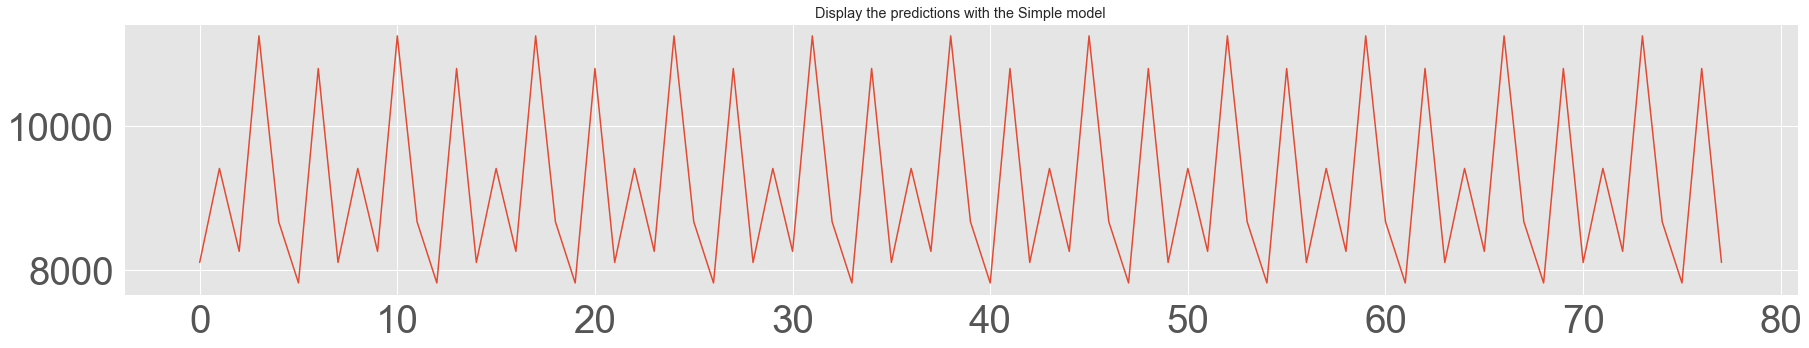

In [65]:
plt.figure(figsize=(30, 5))
plt.plot(plot_basic_PC)
plt.title('Display the predictions with the Simple model')
plt.show()

In [66]:
basic_pred_PC

,Date,weekday,Product Checkouts
0,2021-12-07,1.0,7825.871676
1,2021-12-14,1.0,7825.871676
2,2021-12-21,1.0,7825.871676
3,2021-12-28,1.0,7825.871676
4,2022-01-04,1.0,7825.871676
...,...,...,...
74,2022-01-26,2.0,10806.290454
75,2022-02-02,2.0,10806.290454
76,2022-02-09,2.0,10806.290454
77,2022-02-16,2.0,10806.290454


In [67]:
basic_pred_PC.to_csv('BASIC-MODEL_PRED_PC_SEPNOTEBOOK_80PRED.csv', index=False)